<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
			<font color=#FF7500>
دانشگاه صنعتی اصفهان - دانشکده علوم ریاضی
            </font>
			<p></p>
			<font color=blue>
مبانی ریاضی علوم داده
            </font>
			<br />
			<br />
پاییز ۱۴۰۱
		</div>
		<hr/>
		<font color=red size=6>
			<br />
			<div align=center>	
مینی‌پروژه‌ی ۱ (فضای ابعاد بالا)
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#1st_observation">
                        مشاهده‌ی اول
                    </a>
				</li>
                <li>
					<a href="#2nd_observation">
                        مشاهده‌ی دوم
                    </a>
				</li>
                <li>
					<a href="#3rd_observation">
                       مشاهده‌ی سوم
                    </a>
				</li>
                <li>
					<a href="#gaussian_annulus_theorem">
                        قضیه‌ی حلقه گوسی
                    </a>
				</li>
                <li>
					<a href="#separating_gaussians">
                       تفکیک توزیع‌های گوسی
                    </a>
				</li>
                <li>
					<a href="#random_projection">
                        Random Projection
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="1st_observation" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مشاهده‌ی اول
        </font>
		<p></p>
		<hr>
حجم پوسته‌ی کره‌ی $d$ بعدی به ضخامت $\frac{c}{d}$ حداقل $1-e^{-c}$ از حجم کل کره است. به عبارتی دیگر در ابعاد بالا تقریبا همه‌ی حجم کره روی پوسته‌ی آن قرار گرفته است.
<br/>
هدف این بخش درک بهتر قضیه‌ی بالا به کمک شبیه‌سازی آن است.
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        ابتدا باید ماژول‌های زیر را "import" کنیم:
        <li>numpy: برای کار با ماتریس‌ها</li>
        <li>matplotlib: برای رسم نمودار</li>
        <li>sqrt: ریشه‌ی دوم</li>
<br/>
	</font>
</div>

In [1]:
######## Code here!
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در اینجا چند تابع ضروری را تعریف می‌کنیم:
<br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        <li>تابعِ محاسبه‌ی نُرم ($\|x\| = \sqrt{\sum_{i=1}^{dim} x_i^2}$)</li>
<br/>
        در این قسمت تابعِ getNorm را با ۱ پارمتر ورودی (که همان برداری است که می‌خواهیم نُرمش را حساب کنیم) تعریف می‌کنیم. در انتها مقدار نُرم را return کنید.
	</font>
</div>

In [2]:
######## Code here!
def getNorm(x):
    sz = np.shape(x);
    if (len(sz) > 1):
        norm = np.array([sqrt(np.sum([x[i][j] * x[i][j] for j in range(sz[1])])) for i in range(sz[0])]);
    else:
        norm = np.array(np.sqrt(np.sum([x[i] * x[i] for i in range(sz[0])])));
    return norm;

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        <li>تابعِ محاسبه‌ی ضرب داخلی</li>
<br/>
        در این قسمت تابعِ getInnerProduct را با ۲ پارامتر ورودی (که همان بردارهایی هستند که می‌خواهیم ضرب داخلی‌شان را محاسبه کنیم) تعریف می‌کنیم. در انتها مقدار ضرب داخلی را return کنید.
	</font>
</div>

In [3]:
######## Code here!
def getInnerProduct(u, v):
    answer = 0;
    if (np.shape(u) == np.shape(v)):
        answer = np.sum([u[i] * v[i] for i in range(np.shape(u)[0])]);
    return answer;

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        <li>تابعِ محاسبه‌ی زاویه‌ی بین دو بردار</li>
<br/>
        در این قسمت تابعِ getAngle را با ۲ پارامتر ورودی (که همان بردارهایی هستند که می‌خواهیم زاویه‌ی بینشان را محاسبه کنیم) تعریف می‌کنیم. در انتها مقدار زاویه را return کنید.
	</font>
</div>

In [4]:
######## Code here!
def getAngle(u, v):
    answer = getInnerProduct(u, v) / (getNorm(u) * getNorm(v));
    return answer;

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        <li>تابعِ محاسبه‌ی فاصله‌ی بین دو بردار ($Dist(X,Y) = \sqrt{\sum_{i=1}^{dim} ((x_i-y_i)^2)}$)</li>
<br/>
        در این قسمت تابعِ getDistance را با 2 پارمتر ورودی (دو بردار که قرار است فاصله‌ی بینشان را حساب کنیم) تعریف می‌کنیم. در انتها مقدار فاصله را return کنید.
	</font>
</div>

In [5]:
######## Code here!
def getDistance(X, Y):
    dist = 0
    if len(X) == len(Y):
        dist = np.sqrt(np.sum([(X[i] - Y[i]) ** 2 for i in range(len(X))]))
    return dist

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در این بخش به بردارهای تصادفی در گوی یکه می‌پردازیم. هدف این بخش دیدن این نکته است که در ابعاد بالا بردارهای تصادفی درون گوی یکه تقریبا یکه و متعامدند. برای این منظور طبق الگوریتمی که در کلاس بیان شد عمل می‌کنیم.
        <li>۱۰۰ بردار تصادفی ۱۰۰۰ بعدی از توزیع نرمال با میانگین صفر و انحراف معیار یک بسازید. برای تولید بردارها از تابع np.random.normal استفاده کنید.</li> 
        <li>سپس بردارها را به طولشان تقسیم کنید تا یکه شوند.</li> 
        <li>با استفاده از دستور np.random.rand 
صد عدد تصادفی بین صفر و یک ایجاد کنید. اعداد بدست آمده را به توان $\frac{1}{1000}$ برسانید و در بردارهای قسمت قبل ضرب کنید. حاصل ۱۰۰ بردار تصادفی درون گوی یکه است.</li>
<br/>
	</font>
</div>

In [6]:
######## Code here!
n = 100;
dim = 1000; 
mu, sigma = 0, 1;

k = np.random.normal(mu, sigma, size = (n, dim));
sz = np.shape(k);
norms = getNorm(k);
k = np.array([[k[i][j] / norms[i] for j in range(sz[1])] for i in range(sz[0])]);
y = np.random.rand(n);
y **= 1 / dim;
x = [[y[i] * k[i][j] for j in range(dim)] for i in range(n)];

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
میانگین و انحراف معیار طول بردارهای درون گوی یکه را پیدا کنید.</li>
<br/>
	</font>
</div>

In [7]:
######## Code here!
norms = getNorm(x);
mean1 = np.average(norms);
std1 = np.std(norms);

print(mean1);
print(std1);

0.9990771426949341
0.0010280004636069047


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
چه نتیجه‌ای می‌گیرید؟</li>
<br/>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
30 نقطه‌ی تصادفی درون ابرمکعبِ یکه ($\left[-\frac{1}{2}, \frac{1}{2}  \right]^{100}$) تولید کنید. سپس میانگین فاصله‌ی بین دو به دوی نقاط و میانگین زاویه‌ی بین دو به دوی بردارهای از مبدا به این نقاط را رسم کنید.</li>
<br/>
	</font>
</div>

In [8]:
######## Code here!
z = np.random.uniform(low = -0.5, high = 0.5, size = (30, 100));
distances = [getDistance(z[i], z[j]) for i in range(30) for j in range(30) if i != j];
angles = [getAngle(z[i], z[j]) for i in range(30) for j in range(30) if i != j];
print(np.average(distances))
print(np.average(angles))

4.065252294323313
0.011957044354799039


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
چه نتیجه‌ای می‌گیرید؟</li>
<br/>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

<p></p>
<br />
<div id="2nd_observation" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مشاهده‌ی دوم
        </font>
		<p></p>
		<hr>
حجم نوار استوا به ضخامت $\frac{c}{\sqrt{d-1}}$ حداقل $1-\frac{2}{c}e^{-\frac{c^2}{2}}$ از حجم کل کره است.
<br/>
هدف این بخش درک بهتر قضیه‌ی بالا به کمک شبیه‌سازی آن است.
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
ضرب داخلی دو‌به‌دوی بردارهای درون گوی یکه (که در قسمت قبل به دست آمد) را بدست آورید و سپس میانگین و انحراف معیار این اعداد را پیدا کنید.</li>
<br/>
	</font>
</div>

In [9]:
######## Code here!
inner_products = [getInnerProduct(x[i], x[j]) for i in range(n) for j in range(n) if i != j];
mean2 = np.average(inner_products);
std2 = np.std(inner_products);

print(mean2);
print(std2);

5.124944064550071e-05
0.03194270268637276


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
چه نتیجه‌ای می‌گیرید؟</li>
<br/>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
۵۰۰ نقطه تصادفی روی گوی یکه ۵۰ بعدی تولید کنید. سپس ۵ نقطه تصادفی دیگر روی این گوی یکه تولید کنید. فرض کنید هر یک از این ۵ نقطه قطب شمال هستند و برای هر کدام یک نوار نزدیک استوا به ضخامت $\frac{c}{\sqrt{50-1}}$ در نظر بگیرید. به ازای $c$های از 1 تا 5 حساب کنید چند درصد از آن ۵۰۰ نقطه در هر کدام از این ۵ نوار قرار دارند.</li>
<br/>
	</font>
</div>

In [10]:
######## Code here!
def isOnStrip(c, x, pole):
    threshold = c / np.sqrt(50-1)
    if (np.abs(getInnerProduct(x, pole)) < threshold):
        return 1
    else:
        return 0
n = 500;
dim = 50;
mu, sigma = 0, 1;
points = np.random.normal(mu, sigma, size = (n, dim));
points_norms = getNorm(points);
points = np.array([[points[i][j] / points_norms[i] for j in range(dim)] for i in range(n)]);
poles = np.random.normal(mu, sigma, size = (5, dim));
poles_norms = getNorm(poles);
poles = np.array([[poles[i][j] / poles_norms[i] for j in range(dim)] for i in range(5)]);
c = 3;
result = [sum([isOnStrip(c, points[i], poles[j]) for i in range(n)]) for j in range(5)];
print(result);

[499, 497, 500, 500, 499]


<p></p>
<br />
<div id="3rd_observation" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
مشاهده‌ی سوم
        </font>
		<p></p>
		<hr>
حجم اشتراک مکعب به ضلع $k\sqrt{\frac{\ln d}{d-1}}$ به مرکز مبدا با گوی واحد حداقل $1-\frac{2}{k\sqrt{d^{k^{2}-2}\ln d}}$ حجم کره است.
<br/>
هدف این بخش درک بهتر قضیه‌ی بالا به کمک شبیه‌سازی آن است.
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
1000 بردار تصادفی 1000 بعدی درون گوی یکه (مشابه مشاهده اول) تولید کنید. بررسی کنید که چند درصد این بردارها درون ابرمکعب 1000 بعدی به مرکز مبدا مختصات و به ضلع $4\sqrt{\frac{\ln 1000}{1000-1}}$ قرار دارد (برای بررسی اینکه آیا یک بردار در ابرمکعب $d$ بعدی به مرکز مبدا مختصات و ضلع $2k\sqrt{\frac{\ln d}{d-1}}$ قرار دارد یا نه بررسی کنید که آیا همه مولفه‌هایش در بازه‌ی $\left[ -k\sqrt{\frac{\ln d}{d-1}}, +k\sqrt{\frac{\ln d}{d-1}} \right]$ قرار دارد یا نه).</li>
<br/>
	</font>
</div>

In [11]:
######## Code here!
def howManyInCube(v, r):
    n = v.shape[0];
    dim = v.shape[1];
    sum = 0;
    for i in range(n):
        is_in_cube = True;
        for j in range(dim):
            if (v[i][j] < -r or v[i][j] > r):
                is_in_cube = False;
                break;
        if (is_in_cube):
            sum += 1;
    return 100 * (sum / n);

n = 1000;
dim = 1000; 
mu, sigma = 0, 1;

k = np.random.normal(mu, sigma, size = (n, dim));
sz = np.shape(k);
norms = getNorm(k);
k = np.array([[k[i][j] / norms[i] for j in range(sz[1])] for i in range(sz[0])]);
y = np.random.rand(n);
y **= 1 / dim;
x = np.array([[y[i] * k[i][j] for j in range(dim)] for i in range(n)]);
# r is half of cube side length
r = 2 * np.sqrt(np.log(dim) / (dim - 1))
print(howManyInCube(x, r))

100.0


<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در این قسمت قصد داریم با تغییر $k$، تغییراتِ درصدِ بردارهایی که در ابرمکعب قرار می‌گیرند را مشاهده کنیم. 
به ازای $k \in \left[ 0.1, 2 \right]$ با دقت $0.025$ (یک حلقه روی بازه‌ی مذکور بزنید و $k$ را 25 هزارم 25 هزارم افزایش دهید)، حساب کنید که چند درصد از بردارها درون ابرمکعب قرار دارند. اعداد به دست آمده را در یک لیست بریزید و در نهایت نمودار را به ازای مقادیر $k$ و درصدهای به دست آمده رسم کنید.</li>
<br/>
	</font>
</div>

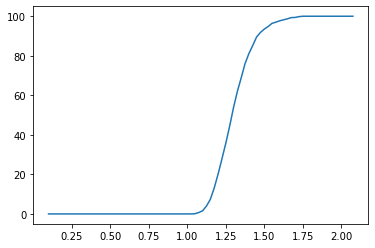

In [12]:
######## Code here!
n = 1000;
dim = 1000; 
mu, sigma = 0, 1;

k = np.random.normal(mu, sigma, size = (n, dim));
sz = np.shape(k);
norms = getNorm(k);
k = np.array([[k[i][j] / norms[i] for j in range(sz[1])] for i in range(sz[0])]);
y = np.random.rand(n);
y **= 1 / dim;
x = np.array([[y[i] * k[i][j] for j in range(dim)] for i in range(n)]);

x_3 = [];
y_3 = [];
for r in np.arange(0.1, 2 + 0.1, 0.025):
    x_3.append(r);
    y_3.append(howManyInCube(x, r * np.sqrt(np.log(dim) / (dim - 1))))
plt.plot(x_3, y_3)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
این بار می‌خواهیم تغییرات درصدها را با توجه به تغییرات بعد بردارها مشاهده نماییم. برای این منظور این بار $k$ را ثابت و برابر با 2 قرار دهید و به ازای $d \in \left[10, 1000  \right]$ با دقت 10 (یک حلقه روی بازه‌ی مذکور بزنید و $d$ را ده تا ده تا زیاد کنید)  هر بار بردارهای $d$ بعدی درون گوی یکه را تولید کنید سپس حساب کنید که چند درصد از بردارها درون ابرمکعب قرار دارند. اعداد به دست آمده را در یک لیست بریزید و در نهایت نمودار را به ازای مقادیر مختلف $d$ و درصدهای به دست آمده رسم کنید. 
        </li>
<br/>
	</font>
</div>

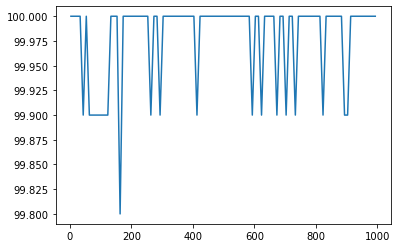

In [15]:
######## Code here!
n = 1000;
x_4 = [];
y_4 = [];
r = 2;
for dim in range(3, 1001, 10):
    mu, sigma = 0, 1;
    k = np.random.normal(mu, sigma, size = (n, dim));
    sz = np.shape(k);
    norms = getNorm(k);
    k = np.array([[k[i][j] / norms[i] for j in range(sz[1])] for i in range(sz[0])]);
    y = np.random.rand(n);
    y **= 1 / dim;
    x = np.array([[y[i] * k[i][j] for j in range(dim)] for i in range(n)]);
    x_4.append(dim);
    y_4.append(howManyInCube(x, r * np.sqrt(np.log(dim) / (dim - 1))))
plt.plot(x_4, y_4);

<p></p>
<br />
<div id="gaussian_annulus_theorem" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
قضیه‌ی حلقه گوسی
        </font>
		<p></p>
		<hr>
اگر $x \sim N^d(0,1)$ و $0 \lt \beta \lt \sqrt{d}$ آنگاه داریم: $Pr\left( \left| \left\| x \right\| -\sqrt{d} \right| \gt \beta \right) \le  3e^{-\frac{\beta^2}{96}}$
<br/>
هدف این بخش درک بهتر قضیه‌ی بالا به کمک شبیه‌سازی آن است.
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در این قسمت می‌خواهیم با تغییر $\beta$، ِتغییراتِ درصدِ بردارهایی که در گوی به شعاع $\sqrt{d}$ قرار می‌گیرند را مشاهده کنیم. برای این منظور مراحل زیر را انجام دهید:
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>1000 بردار 1000 بعدی نرمال تولید کنید. به ازای $\beta \in \left( 0.1, 3 \right)$ با دقت $0.1$، درصدِ بردارهایی که خارج گوی به شعاع $\sqrt{d} \pm \beta$ قرار می‌گیرند را حساب کنید و نمودار درصدها را برحسب $\beta$ رسم نمایید.</li>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

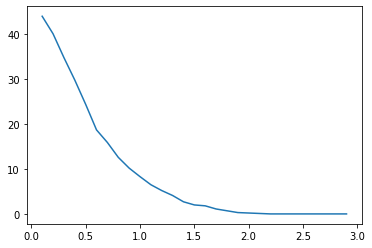

In [16]:
######## Code here!
def howManyOutSphere(v, beta):
    n = v.shape[0];
    dim = v.shape[1];
    sum = 0;
    for i in range(n):
        if (getNorm(v[i]) > np.sqrt(dim) + beta or np.sqrt(dim) < np.sqrt(dim) - beta):
            sum += 1;
    return 100 * (sum / n);


n = 1000;
dim = 1000;
mu, sigma = 0, 1;

k = np.random.normal(mu, sigma, size = (n, dim));
x_5 = [];
y_5 = [];
for beta in np.arange(0.1, 3, 0.1):
    x_5.append(beta);
    y_5.append(howManyOutSphere(k, beta))
plt.plot(x_5, y_5)

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
چه نتیجه‌ای می‌گیرید؟</li>
<br/>
	</font>
</div>

### Answer here!
<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
اینجا بنویسید...</li>
<br/>
	</font>
</div>

<p></p>
<br />
<div id="separating_gaussians" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
تفکیک توزیع‌های گوسی
        </font>
		<p></p>
		<hr>
<br/>
هدف این بخش دسته بندی کردن نقاط و نسبت دادن آن‌ها به توزیع گوسی مربوط به خود می‌باشد.
<br/><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
برای این منظور مراحل زیر را انجام دهید:
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>تولید m بردار از توزیع نرمال با میانگین بردار ثابت ۰ و انحراف معیار ۱ با بعد d</li>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

In [2]:
m = 10
dim = 3000 
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, size = (m, dim))
print(x.shape)

(10, 3000)


<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li> تولید m بردار از توزیع نرمال با میانگین بردار ثابت 1 و انحراف معیار ۱ با بعد d</li>
    </ul>
</p>
	</font>

In [3]:
mu, sigma = 1, 1
y = np.random.normal(mu, sigma, size = (m, dim))
print(y.shape)

(10, 3000)


<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>در این قسمت داده‌ها را لیبل دار کنید. برای بردار‌های x یک ستون ۰ و برای بردار‌های y یک ستون ۱ به آخر داده‌ها اضافه کنید. (برای این کار از تابع np.ones و np.zeros و np.concatenate استفاده کنید)</li>
    </ul>
</p>
	</font>

In [19]:
######## Code here!
x_label = np.zeros((m, 1))
y_label = np.ones((m, 1))
####### np.concatenate
x = np.concatenate((x, x_label), axis = 1)
y = np.concatenate((y, y_label), axis = 1)
########
allpoint = np.concatenate((x, y), axis = 0)
print(allpoint.shape)

(20, 3001)


In [20]:
######## Code here!
def getDistance(X, Y):
    dif = 0
    if len(X) == len(Y):
        dif = np.sqrt(np.sum([(X[i] - Y[i]) ** 2 for i in range(len(X))]))
    return dif

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>پیدا کردن فاصله دو به دو نقاط (دقت شود ستون اخر داده allpoint لیبل میباشد و در محاسبات نباید حضور داشته باشد. )</li>
    </ul>
</p>
	</font>

In [21]:
######## Code here!
allpoint_without_label = allpoint[:, 0: -1]
distances = np.zeros((len(allpoint_without_label), len(allpoint_without_label)))
for i in range(0, len(allpoint_without_label)):
    for j in range(0, len(allpoint_without_label)):        
         distances[i, j] = getDistance(allpoint_without_label[i], allpoint_without_label[j])
print(distances)

[[ 0.         75.61330241 76.51916445 76.80545142 76.59599839 74.98898893
  76.26609022 75.91514055 75.73647413 75.75311238 93.44292068 94.51288006
  94.25209256 94.06566653 95.41300442 94.24076926 94.29426775 94.2890543
  93.78928478 94.55255892]
 [75.61330241  0.         77.79820562 76.17880754 77.28703137 77.24037778
  77.19003961 76.7449273  76.70378757 77.8292476  93.23832634 95.77439999
  93.99448468 95.6518701  95.19107887 94.11633251 94.94713121 94.30589322
  94.76431334 94.65992333]
 [76.51916445 77.79820562  0.         77.83770498 78.6189992  76.14563751
  77.02633888 78.38362904 77.81741354 78.34498401 94.01419578 93.88104848
  94.28925924 94.90746189 95.17405355 93.54716082 94.35178613 95.28820816
  94.62219989 94.18732397]
 [76.80545142 76.17880754 77.83770498  0.         78.1535476  76.58673417
  77.11808626 77.58344982 77.2530857  78.19682423 92.41779849 93.21641481
  93.76331801 93.67790828 94.78189004 93.99277839 94.00586542 93.92378274
  93.7650102  92.14124844]
 [76.

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>نمایش فاصله ها (برای نمایش داده ها از plt.scatter استفاده شود. از distances_plot به عنوان مولفه x استفاده شود. برای مولفه y از np.zeros استفاده کنید.</li>
    </ul>
</p>
	</font>

(20, 20)
Error value:0.0


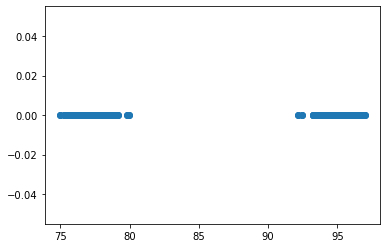

In [22]:
######## Code here!
distances_plot = distances[distances != 0]
print(distances.shape)
x_s = distances_plot
y_s = np.zeros(len(distances_plot))
plt.scatter(x_s, y_s)

########
error = 0
distance_threshold = 85

######## compute error
for i in range(len(distances)):
    for j in range(len(distances[i])):
        if (distances[i][j] < distance_threshold and allpoint[i, dim] != allpoint[j, dim]) or (distances[i][j] > distance_threshold and allpoint[i, dim] == allpoint[j, dim]):
            error += 1
print("Error value:{}".format(error / (len(distances) ** 2)))

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
در این قسمت می‌خواهیم تغییرات خطا را با توجه به فاصله‌ی میانگین‌های دو توزیع از یکدیگر مشاهده کنیم. برای این منظور دقیقا مشابه قسمت قبل بردارهایی از دو توزیع با میانگین‌های $0$ و $\Delta$ بسازید. خطا را به ازای مقادیر $\Delta \in \left[ 1, 8 \right]$ و با دقت $0.1$ تولید کنید و هر بار خطا را محاسبه کنید. در آخر نمودار خطا برحسب مقدار $\Delta$ را رسم کنید. نتایج را با $2\sqrt{d}$ و $\sqrt[4]{d}$ مقایسه کنید. چه نتیجه‌ای می‌گیرید؟
        <p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
    </ul>
</p>
	</font>
</div>
        </li>
<br/>
	</font>
</div>

(10, 3001)
(10, 3000)
(20, 3001)
[[ 0.         78.02978841 80.44682173 77.09917704 76.25960033 78.20808326
  77.34303386 78.64395469 78.61283758 78.66035535 78.86908976 79.16799146
  77.73189097 78.19047425 77.94607511 77.35242205 79.10690905 80.14972274
  78.88086609 78.7441847 ]
 [78.02978841  0.         79.66030218 77.83640102 75.37005871 76.16630552
  77.47328024 77.45300245 76.43813868 78.21796802 78.25613821 77.30183915
  76.30288728 77.0737526  77.59303039 76.95787488 77.08629743 78.63937558
  77.1992164  76.78059968]
 [80.44682173 79.66030218  0.         78.51730325 78.07365117 80.03343006
  78.03183052 78.63393967 78.02609532 79.64791288 78.18565445 79.4598273
  78.10434227 78.40735776 78.07493377 76.84791078 80.70128297 78.38324042
  78.09758444 78.57513425]
 [77.09917704 77.83640102 78.51730325  0.         76.21433696 79.2803569
  75.71438136 77.5811362  76.76174403 78.19361145 77.44503399 78.67159874
  77.26797211 77.44623401 78.04787187 77.86019839 78.59684859 78.5815629
 

[[ 0.         78.02978841 80.44682173 77.09917704 76.25960033 78.20808326
  77.34303386 78.64395469 78.61283758 78.66035535 79.60774558 78.92431492
  78.91219081 79.75530144 79.95648881 79.78448903 81.09870711 79.34596286
  80.07628327 80.05697014]
 [78.02978841  0.         79.66030218 77.83640102 75.37005871 76.16630552
  77.47328024 77.45300245 76.43813868 78.21796802 79.49010934 78.51907614
  79.01316307 77.96144293 76.85241932 78.64801582 78.54142995 80.06040982
  78.16334063 79.01694593]
 [80.44682173 79.66030218  0.         78.51730325 78.07365117 80.03343006
  78.03183052 78.63393967 78.02609532 79.64791288 80.95886923 79.96754543
  79.84629999 78.39098239 79.82408283 81.30224785 80.83716471 81.24499871
  79.35968755 79.27845186]
 [77.09917704 77.83640102 78.51730325  0.         76.21433696 79.2803569
  75.71438136 77.5811362  76.76174403 78.19361145 79.81739335 79.68999596
  79.46735606 78.46834323 79.43918446 80.31042781 79.60445943 79.13541462
  77.60307538 80.86852643]
 [76.

[[ 0.         78.02978841 80.44682173 77.09917704 76.25960033 78.20808326
  77.34303386 78.64395469 78.61283758 78.66035535 82.90614713 83.07437246
  82.19726403 83.07254453 82.57019035 82.49452313 81.96998041 82.38102906
  81.64154137 81.88179104]
 [78.02978841  0.         79.66030218 77.83640102 75.37005871 76.16630552
  77.47328024 77.45300245 76.43813868 78.21796802 81.83539022 82.88174012
  80.92079805 81.20670718 80.57258005 81.68585914 82.18062623 83.4553361
  81.4341029  81.52194512]
 [80.44682173 79.66030218  0.         78.51730325 78.07365117 80.03343006
  78.03183052 78.63393967 78.02609532 79.64791288 83.91853425 84.36983116
  81.7584155  83.36898409 82.61310328 83.52602878 82.91871703 83.46244597
  84.04695397 83.7135618 ]
 [77.09917704 77.83640102 78.51730325  0.         76.21433696 79.2803569
  75.71438136 77.5811362  76.76174403 78.19361145 83.20593906 83.89017294
  82.10222651 82.90780931 82.01805364 82.90080577 81.85520985 83.79967191
  82.13526798 81.70422723]
 [76.2

[[ 0.         78.02978841 80.44682173 77.09917704 76.25960033 78.20808326
  77.34303386 78.64395469 78.61283758 78.66035535 85.08735944 88.149742
  85.89346819 87.50776813 85.53108364 86.2985719  88.35941796 87.83512497
  85.87165595 86.05851857]
 [78.02978841  0.         79.66030218 77.83640102 75.37005871 76.16630552
  77.47328024 77.45300245 76.43813868 78.21796802 84.99016757 87.25885917
  86.40574055 85.4757504  84.74459591 86.04916606 87.32240625 87.15672164
  85.75987948 84.13627693]
 [80.44682173 79.66030218  0.         78.51730325 78.07365117 80.03343006
  78.03183052 78.63393967 78.02609532 79.64791288 85.72628408 88.8647262
  87.31665401 87.43716065 88.69675601 87.32708162 88.64389854 88.07780776
  87.67022034 87.12939668]
 [77.09917704 77.83640102 78.51730325  0.         76.21433696 79.2803569
  75.71438136 77.5811362  76.76174403 78.19361145 86.30455061 87.7850184
  87.94895062 87.61639203 86.04693332 86.4327858  87.89912414 88.18194576
  85.75440954 86.2854465 ]
 [76.2596

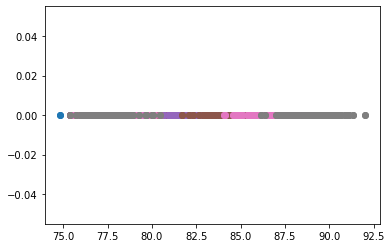

In [13]:
m = 10
dim = 3000 
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, size = (m, dim))
x_label = np.zeros((m, 1))
x = np.concatenate((x, x_label), axis = 1)

print(x.shape)

######## Code here!
def getDistance(X, Y):
    dif = 0
    if len(X) == len(Y):
        dif = np.sqrt(np.sum([(X[i] - Y[i]) ** 2 for i in range(len(X))]))
    return dif

errors = np.zeros(8)
for mu in range(1, 9):
    sigma = 1
    y = np.random.normal(mu / 10, sigma, size = (m, dim))
    print(y.shape)

    ######## Code here!
    y_label = np.ones((m, 1))
    ####### np.concatenate
    y = np.concatenate((y, y_label), axis = 1)
    ########
    allpoint = np.concatenate((x, y), axis = 0)
    print(allpoint.shape)





    ######## Code here!
    allpoint_without_label = allpoint[:, 0: -1]
    distances = np.zeros((len(allpoint_without_label), len(allpoint_without_label)))
    for i in range(0, len(allpoint_without_label)):
        for j in range(0, len(allpoint_without_label)):        
             distances[i, j] = getDistance(allpoint_without_label[i], allpoint_without_label[j])
    print(distances)


    ######## Code here!
    distances_plot = distances[distances != 0]
    print(distances.shape)
    x_s = distances_plot
    y_s = np.zeros(len(distances_plot))
    plt.scatter(x_s, y_s)

    ########
    error = 0
    distance_threshold = 85

    ######## compute error
    for i in range(len(distances)):
        for j in range(len(distances[i])):
            if (distances[i][j] < distance_threshold and allpoint[i, dim] != allpoint[j, dim]) or (distances[i][j] > distance_threshold and allpoint[i, dim] == allpoint[j, dim]):
                error += 1
    #print("Error value:{}".format(error / (len(distances) ** 2)))
    errors[mu - 1] = error

In [14]:
print(errors)

[200. 200. 200. 200. 198. 122.  16.   0.]


<p></p>
<br />
<div id="random_projection" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<font color=#FF7500 size=6>
کاهش بعد (Random Projection)
        </font>
		<p></p>
		<hr><br/>
	</font>
</div>

<p></p>
<br/>
<div id="sec_1" style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=5>
		<p></p>
		<hr>
        <li>تابعِ محاسبه‌ی تصویر بردار روی زیرفضا</li>
<br/>
در این قسمت تابعِ projectSubspace را با 2 پارامتر ورودی (که اولی آرایه‌ای $m \times d$ از $m$ بردار $d$ بعدی است که می‌خواهیم آن‌ها را تصویر کنیم و دومی آرایه‌ای $k \times d$ از $k$ بردار مستقل گوسی $d$ بعدی است که قرار است تصویر کردن به کمک آن‌ها انجام شود). برای این منظور مراحل زیر را انجام دهید:
<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <li>به ازای هر یک از بردارهای پارامتر ورودی اول، ضرب داخلی آن بردار را با هر یک از kتا بردار موجود در پارامتر ورودی دوم را به دست آورید و در نهایت آن را بر $\sqrt{k}$ تقسیم کنید.</li>
    </ul>
</p>
	</font>
</div>

In [63]:
######## Code here!
def projectSubspace(X, W):
    d = 0
    m = 0
    dim_of_x = len(X.shape)
    if (dim_of_x > 1):
        m = X.shape[0]
    else:
        m = 1
    k = W.shape[0]
    d = W.shape[1]
    if (dim_of_x == 1):
        projection = [getInnerProduct(X, W[i]) for i in range(k)]
    else:
        projection = [[getInnerProduct(X[i], W[j]) for j in range(k)] for i in range(m)]
    return projection

<p style='direction:rtl; text-align: right'>
    <ul style='direction:rtl; text-align: right'>
        <font face="B Nazanin" size=5>
        <li>u: تولید n بردار از توزیع نرمال با میانگین ۰ و انحراف معیار ۱ با بعد d</li>
        <li>v: تولید k بردار از توزیع نرمال با میانگین ۰ و انحراف معیار ۱ با بعد d</li>
        <li>از تابع projectSubspace استفاده کنید و بردار‌های u را روی بردار‌های v تصویر کنید و حاصل را در ans ذخیره کنید.</li>
        <li>فاصله دو به دو بردار‌های ans را حساب کنید و میانگین فاصله‌ها را نمایش دهید.</li>
        <li>فاصله دو به دو بردار‌های u را حساب کنید و میانگین فاصله‌ها را نمایش دهید.</li>
    </ul>
</p>
	</font>
</div>

In [64]:
######## Code here!
n = 100
k = int(10 * np.log(n))
dim = 500
mu, sigma = 0, 1
u = np.random.normal(mu, sigma, size = (n, dim))
v = np.random.normal(mu, sigma, size = (k, dim))
random_projection = projectSubspace(u, v)
ans = random_projection / np.sqrt(k)
ans_distances = [[distance(ans[i], ans[j]) for j in range(ans.shape[0])] for i in range(ans.shape[0])]
u_distances = [[distance(u[i], u[j]) for j in range(u.shape[0])] for i in range(u.shape[0])]
print(np.average(ans_distances))
print(np.average(u_distances))

31.021824419986324
31.20027527649798
